# Assignment 3

## Q1 Default Network

In [7]:
%pip install numpy
%pip install tensorflow
%pip install matplotlib
%pip install pandas
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

In [10]:
x_train = pd.read_csv('FashionMNISTwithaTwistW25/x_train.csv', header=None).values
x_test = pd.read_csv('FashionMNISTwithaTwistW25/x_test.csv', header=None).values
y_train = pd.read_csv('FashionMNISTwithaTwistW25/y_train.csv', header=None).values
y_test = pd.read_csv('FashionMNISTwithaTwistW25/y_test.csv', header=None).values

### Handling data

In [11]:
x_train_reshaped = x_train.reshape(-1 , 28, 28, 1).astype('float32') / 255.0
x_test_reshaped = x_test.reshape(-1 , 28, 28, 1).astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train, num_classes=5)
y_test = keras.utils.to_categorical(y_test, num_classes=5)

### Building the CNN

In [12]:
def build_cnn():
	model = keras.Sequential([
		layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1), strides=1, padding='same', activation='relu'),
		layers.MaxPooling2D((2, 2)),
		layers.Conv2D(32, (3, 3), strides=1, padding='same', activation='relu'),
		layers.Flatten(),
		layers.Dense(512, activation='relu'),
		layers.Dense(5, activation='softmax')
	])

	model.compile(
		optimizer=keras.optimizers.SGD(),
		loss='categorical_crossentropy',
		metrics=['accuracy']	
	)

	return model

model = build_cnn()
model.summary()

/Users/amos/Documents/uwaterloo_ece457b_a3/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,223,909 (12.30 MB)

 Trainable params: 3,223,909 (12.30 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [13]:

start_train = time.time()
trained_model_q1 = model.fit(x_train_reshaped, y_train, epochs=10, batch_size=64, validation_split=0.2)
end_train = time.time()
print("Base Network Training time: {:.2f} seconds".format(end_train - start_train))

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.7855 - loss: 0.5706 - val_accuracy: 0.9433 - val_loss: 0.1758
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9452 - loss: 0.1722 - val_accuracy: 0.9578 - val_loss: 0.1367
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9535 - loss: 0.1425 - val_accuracy: 0.9550 - val_loss: 0.1409
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9611 - loss: 0.1239 - val_accuracy: 0.9635 - val_loss: 0.1158
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9654 - loss: 0.1099 - val_accuracy: 0.9650 - val_loss: 0.1090
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9702 - loss: 0.1011 - val_accuracy: 0.9662 - val_loss: 0.1077
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9716 - loss: 0.0919 - val_accuracy: 0.9682 - val_loss: 0.1013
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9720 - loss: 0.0946 - 

#### Training and Validation Accuracy vs Epochs

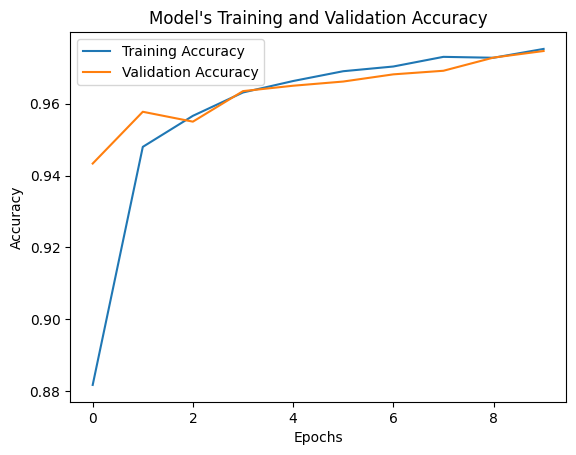

In [6]:
plt.plot(trained_model_q1.history['accuracy'], label='Training Accuracy')
plt.plot(trained_model_q1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model\'s Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Training and Validation Loss vs Epochs

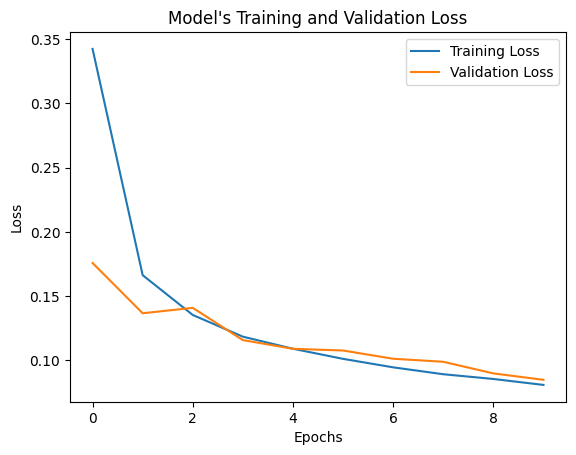

In [15]:
plt.plot(trained_model_q1.history['loss'], label='Training Loss')
plt.plot(trained_model_q1.history['val_loss'], label='Validation Loss')
plt.title('Model\'s Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Evaluation of model

In [16]:

start_test = time.time()
test_loss, test_acc = model.evaluate(x_test_reshaped, y_test)
end_test = time.time()
print("Base Network Test evaluation time: {:.2f} seconds".format(end_test - start_test))
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9756 - loss: 0.0956
Base Network Test evaluation time: 0.91 seconds
Test accuracy: 0.9741026163101196


## Q2 Your Own Improvements

In [17]:
x_train_q2, x_val_q2, y_train_q2, y_val_q2 = train_test_split(x_train_reshaped, y_train, test_size=0.2, random_state=42)

In [18]:
data_augmentation = ImageDataGenerator(
	rotation_range=15,
	width_shift_range=0.15,
	height_shift_range=0.15,
	shear_range=0.1,
	zoom_range=0.2,
	horizontal_flip=True,
)
data_augmentation.fit(x_train_q2)

In [19]:
def build_improved_cnn():
	model = keras.Sequential([
		layers.Conv2D(64, (3, 3), input_shape=(28, 28, 1), strides=1, padding='same', activation='relu'),
		layers.BatchNormalization(),
		layers.MaxPooling2D((2, 2)),
		layers.Dropout(0.15),

		layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'),
		layers.BatchNormalization(),
		layers.MaxPooling2D((2, 2)),
		layers.Dropout(0.15),

		layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'),
		layers.BatchNormalization(),
		layers.MaxPooling2D((2, 2)),
		layers.Dropout(0.15),

		layers.Flatten(),
		layers.Dense(512, activation='relu'),
		layers.BatchNormalization(),
		layers.Dropout(0.25),
		layers.Dense(5, activation='softmax')
	])

	model.compile(
		optimizer=keras.optimizers.Adam(learning_rate=3e-4),
		loss='categorical_crossentropy',
		metrics=['accuracy']	
	)

	return model

improved_model = build_improved_cnn()
improved_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,556,229 (5.94 MB)

 Trainable params: 1,554,309 (5.93 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

start_train_q2 = time.time()
improved_model_q2 = improved_model.fit(
	data_augmentation.flow(x_train_q2, y_train_q2, batch_size=32),
	epochs=20,
	validation_data=(x_val_q2, y_val_q2),
	callbacks=[reduce_lr, early_stopping]
	)
end_train_q2 = time.time()
print("Improved Network Training time: {:.2f} seconds".format(end_train_q2 - start_train_q2))

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 58s 39ms/step - accuracy: 0.9735 - loss: 0.0812 - val_accuracy: 0.9779 - val_loss: 0.0637 - learning_rate: 3.0000e-04
Improved Network Training time: 58.12 seconds


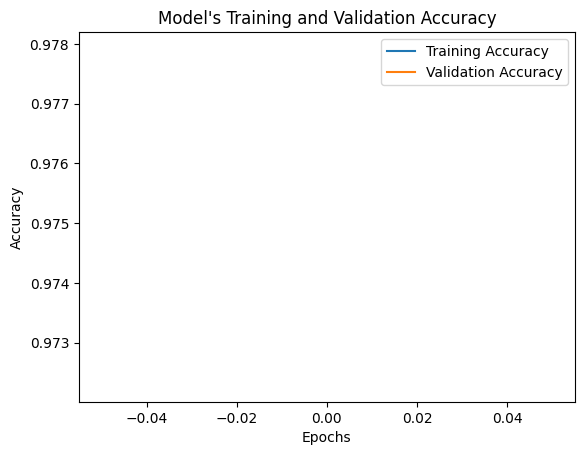

In [47]:
plt.plot(improved_model_q2.history['accuracy'], label='Training Accuracy')
plt.plot(improved_model_q2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model\'s Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

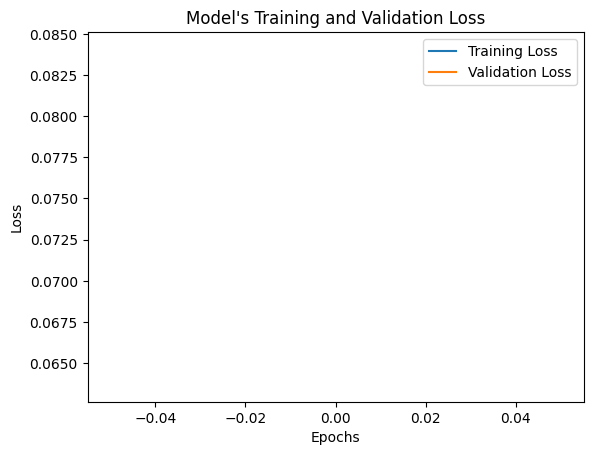

In [48]:
plt.plot(improved_model_q2.history['loss'], label='Training Loss')
plt.plot(improved_model_q2.history['val_loss'], label='Validation Loss')
plt.title('Model\'s Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [49]:

start_test_q2 = time.time()
test_loss, test_acc = improved_model.evaluate(x_test_reshaped, y_test)
end_test_q2 = time.time()
print("Improved Network Test evaluation time: {:.2f} seconds".format(end_test_q2 - start_test_q2))
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9811 - loss: 0.0692
Improved Network Test evaluation time: 2.61 seconds
Test accuracy: 0.979602038860321


In [57]:
from tensorflow.keras import Input, Model

def create_intermediate_model(seq_model, layer_index):
    # Create an explicit input tensor using the sequential model's input shape.
    input_tensor = Input(shape=seq_model.input_shape[1:])  # skip the batch dimension
    x = input_tensor
    # Loop through the layers until we reach the desired layer.
    for i, layer in enumerate(seq_model.layers):
        x = layer(x)
        if i == layer_index:
            print(i, layer.name)
            break
    return Model(inputs=input_tensor, outputs=x)

# For example, if you want the Dense(512, activation='relu') layer at index 13:
encoding_layer_index = 12
intermediate_model = create_intermediate_model(improved_model, encoding_layer_index)


12 flatten_1


In [58]:
# Extract encoded features from test data
encoded_features = intermediate_model.predict(x_test_reshaped)
print("Encoded features shape:", encoded_features.shape)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Encoded features shape: (10001, 2304)


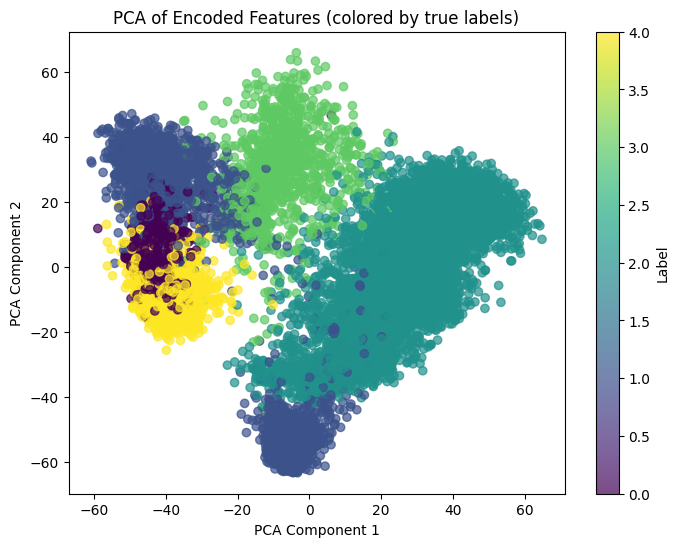

In [59]:
from sklearn.decomposition import PCA

# Convert one-hot encoded labels to integer labels
true_labels = np.argmax(y_test, axis=1)

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
features_pca = pca.fit_transform(encoded_features)

# Plot the PCA-reduced features colored by true labels
plt.figure(figsize=(8, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=true_labels, cmap='viridis', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Encoded Features (colored by true labels)')
plt.colorbar(label='Label')
plt.show()


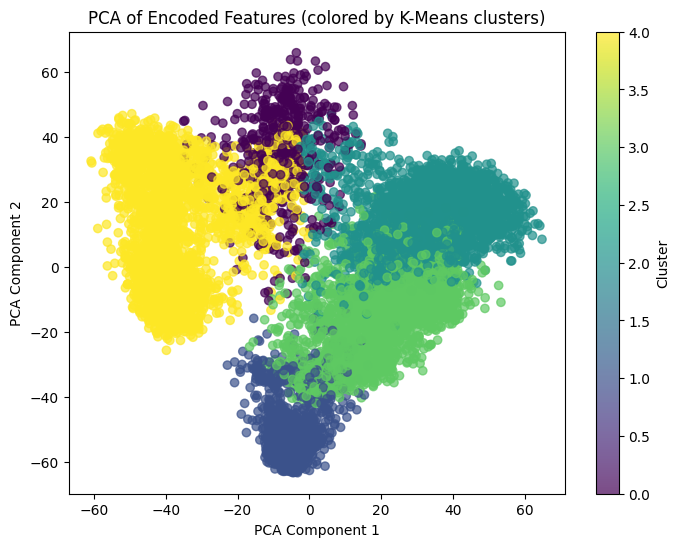

In [60]:
from sklearn.cluster import KMeans

# Apply K-Means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(encoded_features)

# Plot the PCA-reduced features colored by the K-Means clusters
plt.figure(figsize=(8, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Encoded Features (colored by K-Means clusters)')
plt.colorbar(label='Cluster')
plt.show()


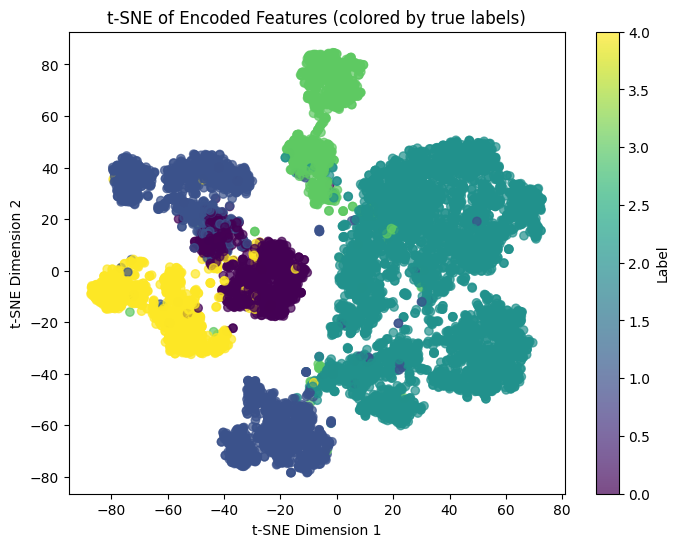

In [61]:
from sklearn.manifold import TSNE

# Apply t-SNE to reduce features to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
features_tsne = tsne.fit_transform(encoded_features)

# Plot t-SNE results colored by the true labels
plt.figure(figsize=(8, 6))
plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=true_labels, cmap='viridis', alpha=0.7)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE of Encoded Features (colored by true labels)')
plt.colorbar(label='Label')
plt.show()



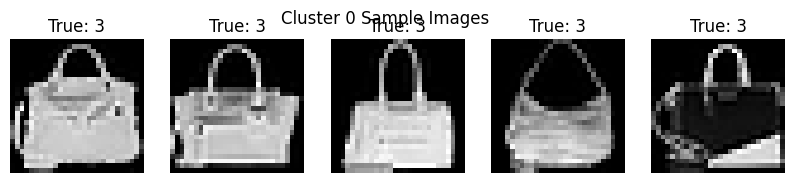

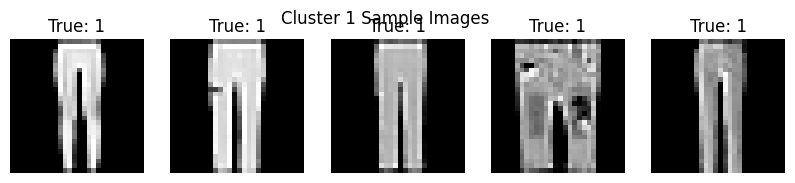

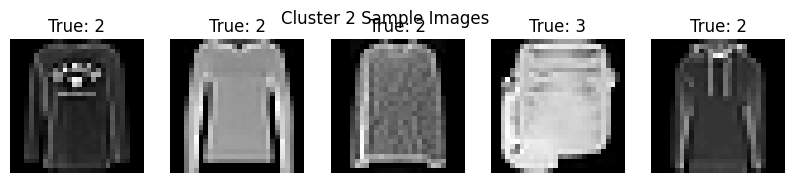

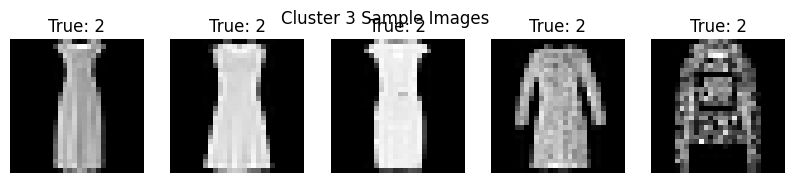

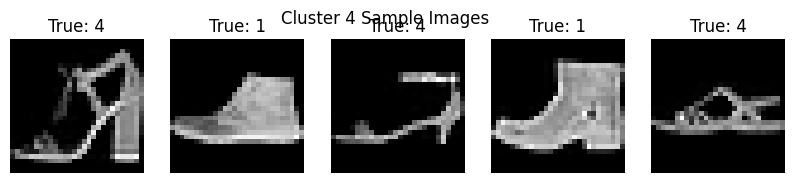

In [62]:
import random

# For each cluster, display a few sample images from the test set
unique_clusters = np.unique(clusters)
for cluster in unique_clusters:
    # Get indices of samples in this cluster
    cluster_indices = np.where(clusters == cluster)[0]
    # Randomly select up to 5 images from the cluster
    sample_indices = random.sample(list(cluster_indices), min(5, len(cluster_indices)))
    
    plt.figure(figsize=(10, 2))
    for i, idx in enumerate(sample_indices):
        plt.subplot(1, 5, i + 1)
        plt.imshow(x_test_reshaped[idx].reshape(28, 28), cmap='gray')
        plt.title(f"True: {true_labels[idx]}")
        plt.axis('off')
    plt.suptitle(f'Cluster {cluster} Sample Images')
    plt.show()
